In [18]:
%pip install opencv-python librosa pandas matplotlib

CSV generado: resultados.csv


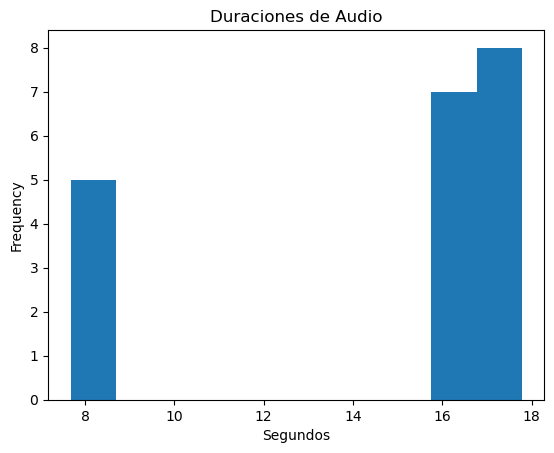

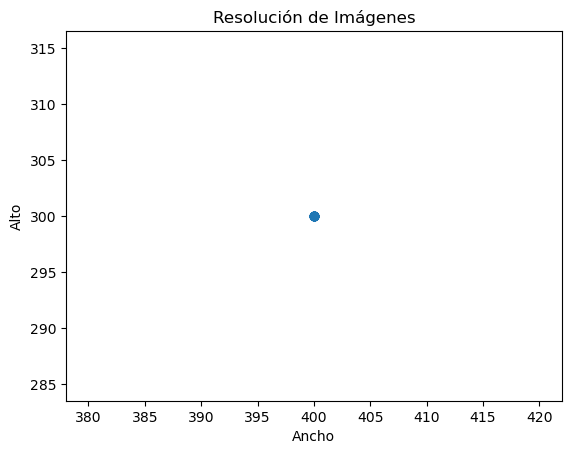

In [8]:
import os
import cv2
import librosa
import pandas as pd
import matplotlib.pyplot as plt

carpeta = r"C:\Users\danie\Downloads\Parcial" #Esta es la ruta de la carpeta de mi computador profe

datos = []

for archivo in os.listdir(carpeta):
    ruta = os.path.join(carpeta, archivo)

    if archivo.lower().endswith(('.jpg', '.jpeg', '.png')):
        img = cv2.imread(ruta)
        if img is not None:
            alto, ancho, _ = img.shape
            color_promedio = img.mean(axis=(0, 1)) 
            datos.append({
                "archivo": archivo,
                "tipo": "imagen",
                "ancho": ancho,
                "alto": alto,
                "color_B": color_promedio[0],
                "color_G": color_promedio[1],
                "color_R": color_promedio[2]
            })

    elif archivo.lower().endswith(('.wav', '.mp3')):
        try:
            y, sr = librosa.load(ruta, sr=None)
            duracion = librosa.get_duration(y=y, sr=sr)
            datos.append({
                "archivo": archivo,
                "tipo": "audio",
                "duracion": duracion,
                "sample_rate": sr
            })
        except Exception as e:
            print(f"Error con audio {archivo}: {e}")

df = pd.DataFrame(datos)
df.to_csv("resultados.csv", index=False)
print("CSV generado: resultados.csv")

if not df[df["tipo"] == "audio"].empty:
    df[df["tipo"] == "audio"]["duracion"].plot(kind="hist", bins=10, title="Duraciones de Audio")
    plt.xlabel("Segundos")
    plt.show()

if not df[df["tipo"] == "imagen"].empty:
    img = df[df["tipo"] == "imagen"]
    plt.scatter(img["ancho"], img["alto"])
    plt.title("Resolución de Imágenes")
    plt.xlabel("Ancho")
    plt.ylabel("Alto")
    plt.show()
